In [1]:
from dataloader import load_real_data, load_base_augmented_data, load_synthetiques_data, merge_parquet_files
from train import train_base_model, train_tl_model
from test import test_model
import pandas as pd

In [2]:
real_data_path = "/content/hourly_day_ahead_prices_2017_2020.parquet"
augmented_data_path = "/content/augmented_data.parquet"
# synthetiques_data_dir = "/content/prix"
synthetiques_data_path = "/content/merge_synthetiques_data.parquet"
# merge_parquet_files(synthetiques_data_dir, synthetiques_data_path)
timegan_data_path = "/content/adjusted_hourly_prices_no_date.parquet"

In [3]:
#
df_real = pd.read_parquet(real_data_path)
df_aug = pd.read_parquet(augmented_data_path)
df_syn = pd.read_parquet(synthetiques_data_path)
df_gan = pd.read_parquet(timegan_data_path)
df_real, df_aug, df_syn, df_gan

(                           price
 date                            
 2016-12-31 23:00:00+00:00  58.82
 2017-01-01 00:00:00+00:00  58.23
 2017-01-01 01:00:00+00:00  51.95
 2017-01-01 02:00:00+00:00  47.27
 2017-01-01 03:00:00+00:00  45.49
 ...                          ...
 2020-12-31 18:00:00+00:00  60.54
 2020-12-31 19:00:00+00:00  56.75
 2020-12-31 20:00:00+00:00  52.44
 2020-12-31 21:00:00+00:00  51.86
 2020-12-31 22:00:00+00:00  52.26
 
 [35064 rows x 1 columns],
            price  hourofday  dayofweek
 0      58.820000         23          5
 1      58.230000          0          6
 2      51.950000          1          6
 3      47.270000          2          6
 4      45.490000          3          6
 ...          ...        ...        ...
 70123  32.961503         19          6
 70124  27.337374         20          6
 70125  29.031426         21          6
 70126  25.374934         22          6
 70127  25.435278         23          6
 
 [70128 rows x 3 columns],
          price  day

In [4]:
# Processing of data
window_size = 168
X_train_real, X_val_real, X_test_real, y_train_real, y_val_real, y_test_real = load_real_data(real_data_path, window_size)
X_train_aug, X_val_aug, X_test_aug, y_train_aug, y_val_aug, y_test_aug = load_base_augmented_data(augmented_data_path, window_size)
X_train_gan, X_val_gan, X_test_gan, y_train_gan, y_val_gan, y_test_gan = load_base_augmented_data(timegan_data_path, window_size)
X_train_syn, X_val_syn, X_test_syn, y_train_syn, y_val_syn, y_test_syn = load_synthetiques_data(synthetiques_data_path, window_size)

In [5]:
X_train_real.shape, X_val_real.shape, X_test_real.shape, y_train_real.shape, y_val_real.shape, y_test_real.shape

((25000, 168, 5),
 (5000, 168, 5),
 (4728, 168, 5),
 (25000, 6),
 (5000, 6),
 (4728, 6))

In [6]:
X_train_aug.shape, X_val_aug.shape, X_test_aug.shape, y_train_aug.shape, y_val_aug.shape, y_test_aug.shape

((40000, 168, 5),
 (15000, 168, 5),
 (14792, 168, 5),
 (40000, 6),
 (15000, 6),
 (14792, 6))

In [7]:
X_train_gan.shape, X_val_gan.shape, X_test_gan.shape, y_train_gan.shape, y_val_gan.shape, y_test_gan.shape

((40000, 168, 5),
 (15000, 168, 5),
 (14792, 168, 5),
 (40000, 6),
 (15000, 6),
 (14792, 6))

In [8]:
X_train_syn.shape, X_val_syn.shape, X_test_syn.shape, y_train_syn.shape, y_val_syn.shape, y_test_syn.shape

((40000, 168, 5),
 (15000, 168, 5),
 (14792, 168, 5),
 (40000, 6),
 (15000, 6),
 (14792, 6))

In [9]:
# Train models based on real data only
model_real_path = "/content/model_real.keras"
model_real = train_base_model(window_size, model_real_path, X_train_real, y_train_real, X_val_real, y_val_real, epochs=10, learning_rate=0.001)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 783.2334 - root_mean_squared_error: 27.2590 - val_loss: 220.1486 - val_root_mean_squared_error: 14.8374
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 269.6578 - root_mean_squared_error: 16.4062 - val_loss: 146.4356 - val_root_mean_squared_error: 12.1011
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 173.3164 - root_mean_squared_error: 13.1627 - val_loss: 134.5642 - val_root_mean_squared_error: 11.6002
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 156.3943 - root_mean_squared_error: 12.5054 - val_loss: 133.3935 - val_root_mean_squared_error: 11.5496
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 142.1561 - root_mean_squared_error: 11.9224 - val_loss: 119.0870 - val_root_mean_squared_error: 10.9127
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 131.8657 - root_mean_squared_error: 11.4828 - val_loss: 114.0768 - val_root_mean_squared_error: 10.6807
Epoc

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


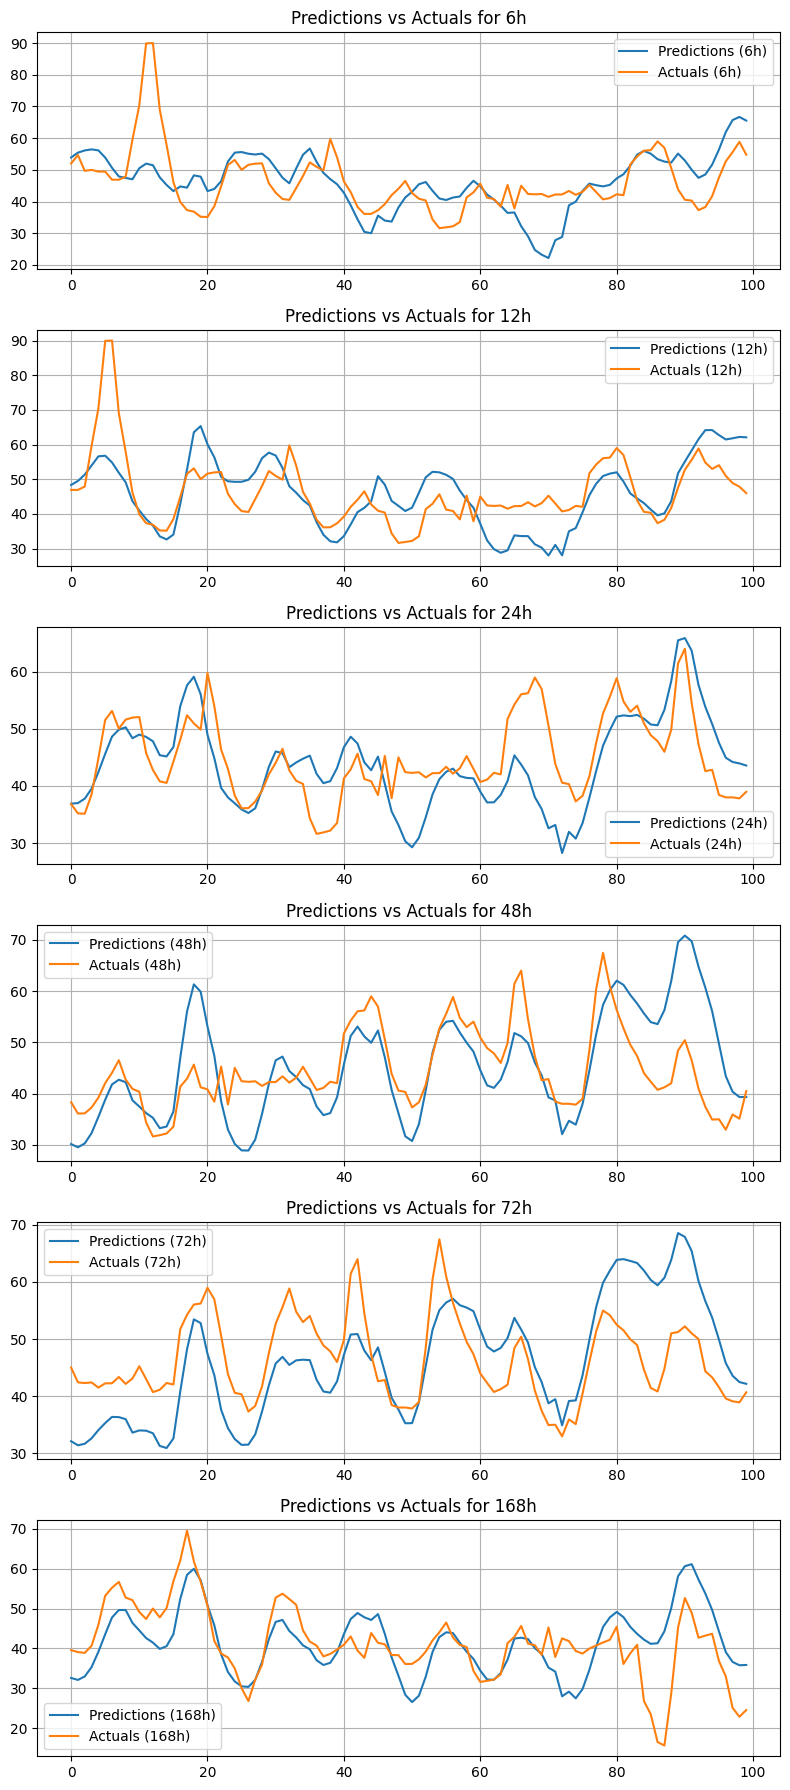

Test MSE for 6h: 78.1715
Test MSE for 12h: 97.6783
Test MSE for 24h: 135.2034
Test MSE for 48h: 184.8357
Test MSE for 72h: 208.8092
Test MSE for 168h: 226.5451


In [10]:
df_real_test, error = test_model(model_real_path, X_test_real, y_test_real)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - loss: 674.0722 - root_mean_squared_error: 25.2524 - val_loss: 371.2291 - val_root_mean_squared_error: 19.2673
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 197.9638 - root_mean_squared_error: 14.0531 - val_loss: 226.3618 - val_root_mean_squared_error: 15.0453
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 155.0015 - root_mean_squared_error: 12.4493 - val_loss: 199.5102 - val_root_mean_squared_error: 14.1248
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - loss: 140.0791 - root_mean_squared_error: 11.8354 - val_loss: 193.9641 - val_root_mean_squared_error: 13.9271
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 135.4329 - root_mean_squared_error: 11.6374 - val_loss: 195.4890 - val_root_mean_squared_error: 13.9817
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 135.8392 - root_mean_squared_error: 11.6548 - val_loss: 191.6509 - val_root_mean_squared_error: 

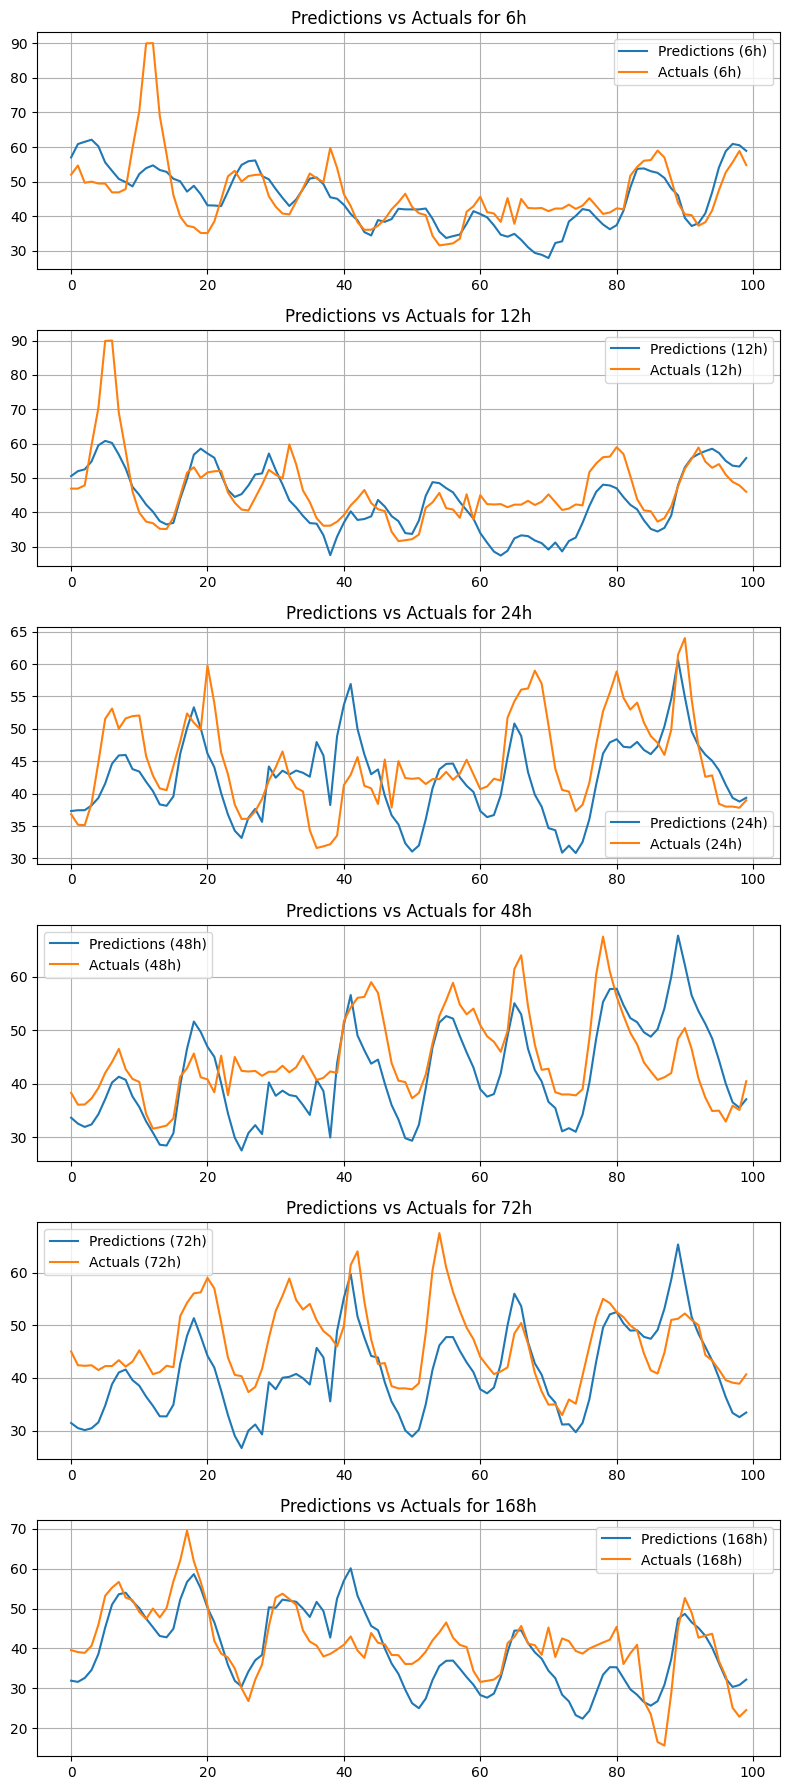

Test MSE for 6h: 61.9313
Test MSE for 12h: 78.1651
Test MSE for 24h: 116.9175
Test MSE for 48h: 138.0617
Test MSE for 72h: 172.8326
Test MSE for 168h: 197.2931


In [14]:
# pre trian model with base augmented data
model_aug_path = "/content/model_aug.keras"
model_aug = train_base_model(window_size, model_aug_path, X_train_aug, y_train_aug, X_val_aug, y_val_aug, epochs=10, learning_rate=0.001)
model_aug_tl_real_path = "/content/model_aug_tl_real.keras"
model_aug_tl_real = train_tl_model(model_aug_path, model_aug_tl_real_path, X_train_real, y_train_real, X_val_real, y_val_real, epochs=10, learning_rate=0.0001)
df_aug_tl_real_test, aug_tl_error = test_model(model_aug_tl_real_path, X_test_real, y_test_real)

In [15]:
# pre trian model with Air Liquide synthetiques data
model_syn_path = "/content/model_syn.keras"
model_syn = train_base_model(window_size, model_syn_path, X_train_syn, y_train_syn, X_val_syn, y_val_syn, epochs=10, learning_rate=0.001)
model_syn_tl_real_path = "/content/model_syn_tl_real.keras"
model_syn_tl_real = train_tl_model(model_syn_path, model_syn_tl_real_path, X_train_real, y_train_real, X_val_real, y_val_real, epochs=10, learning_rate=0.0001)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 673.1329 - root_mean_squared_error: 25.2539 - val_loss: 236.3904 - val_root_mean_squared_error: 15.3750
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 164.7348 - root_mean_squared_error: 12.8329 - val_loss: 201.2146 - val_root_mean_squared_error: 14.1850
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 145.9086 - root_mean_squared_error: 12.0781 - val_loss: 190.0103 - val_root_mean_squared_error: 13.7844
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 141.4958 - root_mean_squared_error: 11.8828 - val_loss: 207.6712 - val_root_mean_squared_error: 14.4108
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 144.6648 - root_mean_squared_error: 12.0273 - val_loss: 200.8033 - val_root_mean_squared_error: 14.1705
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 143.1877 - root_mean_squared_error: 11.9660 - val_loss: 206.0398 - val_root_mean_squared_error: 

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


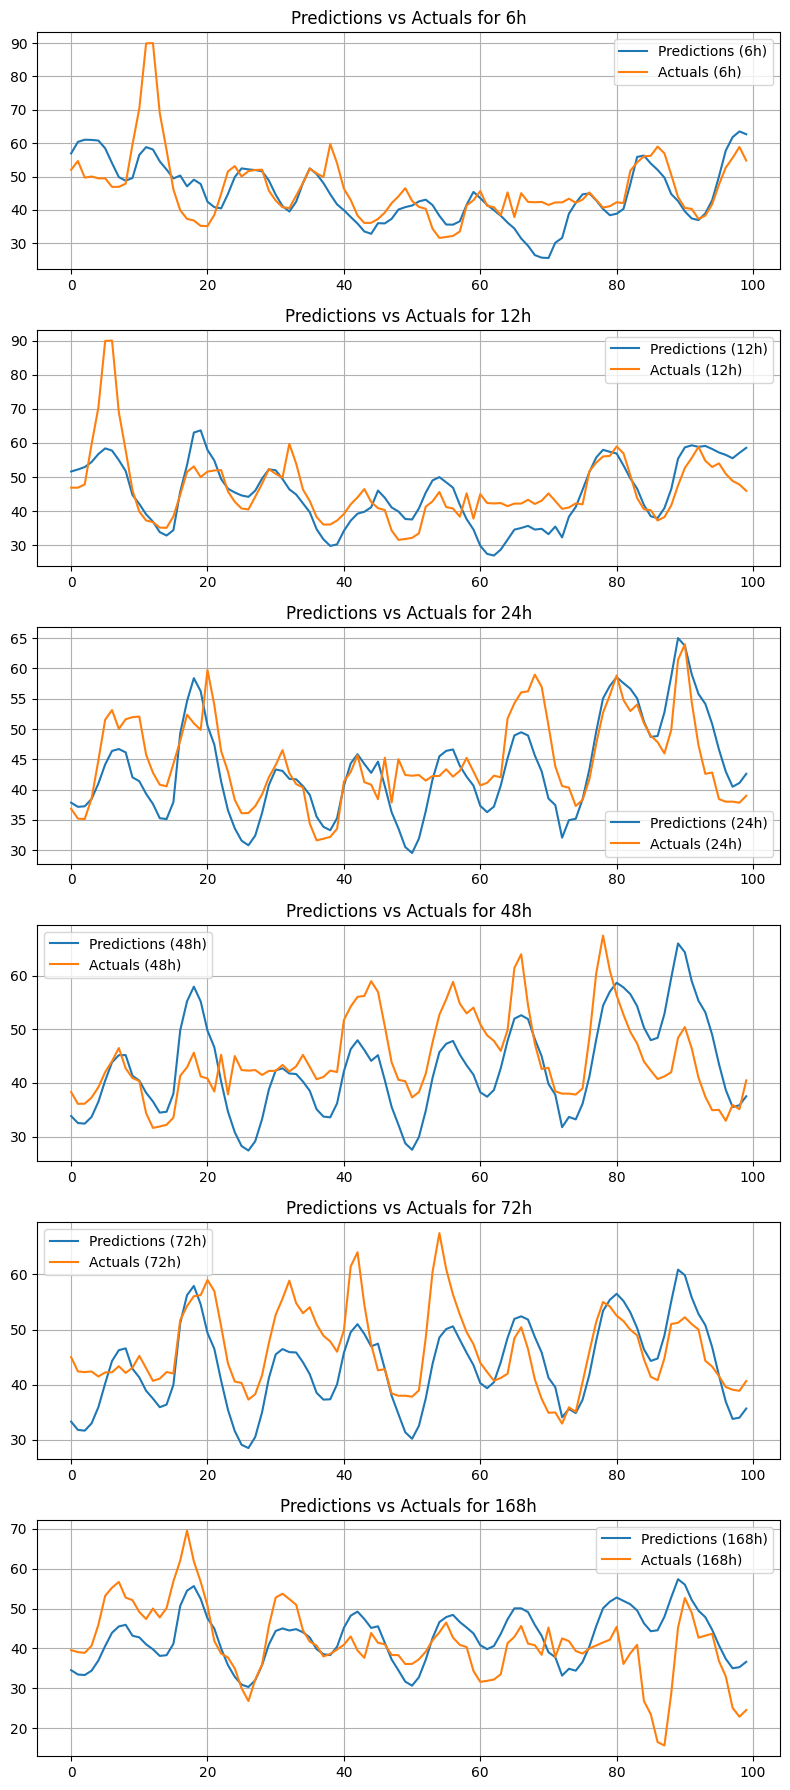

Test MSE for 6h: 66.7146
Test MSE for 12h: 88.4128
Test MSE for 24h: 120.8833
Test MSE for 48h: 164.4043
Test MSE for 72h: 199.9991
Test MSE for 168h: 229.0401


In [16]:
df_syn_tl_real_test, syn_tl_error = test_model(model_syn_tl_real_path, X_test_real, y_test_real)

In [17]:
# pre trian model with timegan augmented data
model_gan_path = "/content/model_gan.keras"
model_gan = train_base_model(window_size, model_gan_path, X_train_gan, y_train_gan, X_val_gan, y_val_gan, epochs=10, learning_rate=0.001)
model_gan_tl_real_path = "/content/model_gan_tl_real.keras"
model_gan_tl_real = train_tl_model(model_gan_path, model_gan_tl_real_path, X_train_real, y_train_real, X_val_real, y_val_real, epochs=10, learning_rate=0.0001)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 676.9203 - root_mean_squared_error: 25.3068 - val_loss: 336.5575 - val_root_mean_squared_error: 18.3455
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 191.6151 - root_mean_squared_error: 13.8289 - val_loss: 221.8399 - val_root_mean_squared_error: 14.8943
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 159.8786 - root_mean_squared_error: 12.6437 - val_loss: 198.9571 - val_root_mean_squared_error: 14.1052
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 138.0348 - root_mean_squared_error: 11.7481 - val_loss: 184.9847 - val_root_mean_squared_error: 13.6009
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - loss: 129.2538 - root_mean_squared_error: 11.3683 - val_loss: 175.8596 - val_root_mean_squared_error: 13.2612
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 119.6452 - root_mean_squared_error: 10.9381 - val_loss: 174.7206 - val_root_mean_squared_error: 

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


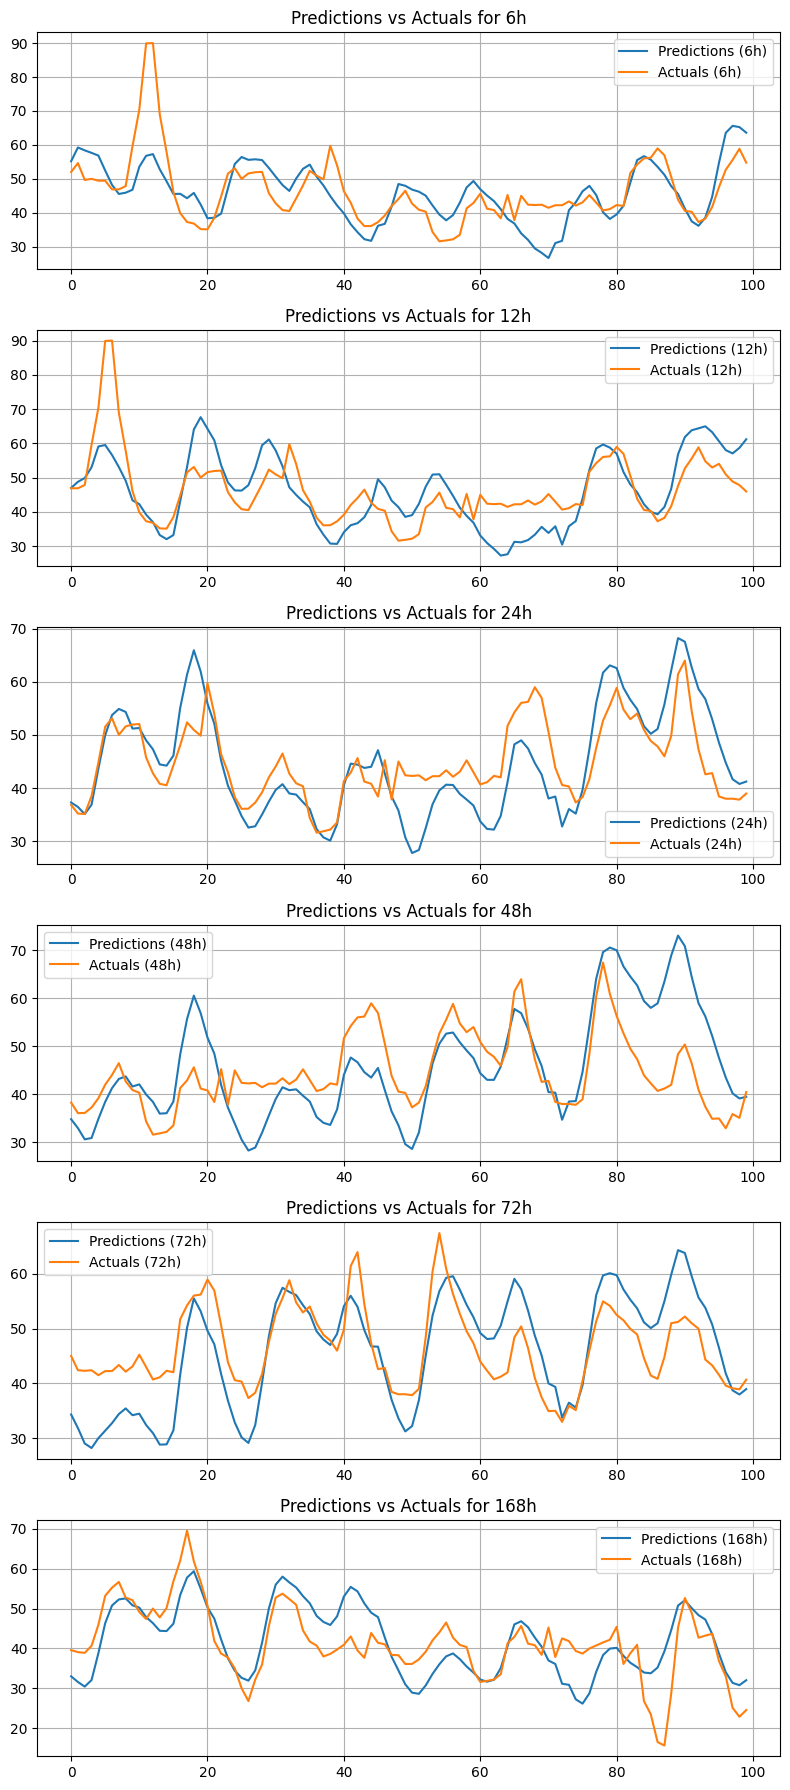

Test MSE for 6h: 60.4112
Test MSE for 12h: 81.4267
Test MSE for 24h: 106.0569
Test MSE for 48h: 149.6456
Test MSE for 72h: 171.8088
Test MSE for 168h: 203.1561


In [18]:
df_gan_tl_real_test, gan_tl_error = test_model(model_gan_tl_real_path, X_test_real, y_test_real)